<a href="https://colab.research.google.com/github/ViniciusLe1te/AulaBI-Data/blob/main/datalake_warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conteúdo do Data warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-15         316         147         2534  produto 316  Eletrônicos
1    2024-04-11         316         190         4502  produto 316  Eletrônicos
2    2024-04-09         316          59         5558  produto 316  Eletrônicos
3    2024-04-23         316         136         6511  produto 316  Eletrônicos
4    2024-04-03         347         137         5133  produto 347    Alimentos
..          ...         ...         ...          ...          ...          ...
995  2024-04-22          56          78         6603   produto 56       Roupas
996  2024-04-22         319         167         9918  produto 319       Roupas
997  2024-04-22         122         181         8428  produto 122  Eletrônicos
998  2024-04-12         221         103         3747  produto 221  Eletrônicos
999  2024-04-23         250         116         8586  produto 250  Eletrônicos

[1000 rows x 6 columns]

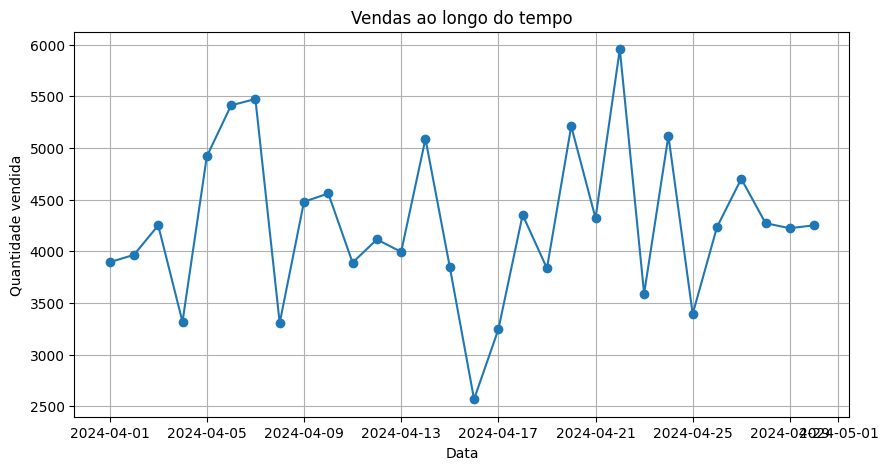


Análise de desempenho de produtos:
nome
produto 1      16131
produto 10      6118
produto 101     9180
produto 102     3055
produto 103    13739
               ...  
produto 94      3602
produto 95      5316
produto 97      7259
produto 98      1273
produto 99     16553
Name: valor_total, Length: 492, dtype: int64


In [2]:
#Data Warehouse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#
num_produtos = 600
produtos = {
    'produto_id' : range(1, num_produtos + 1),
    'nome': [f'produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

#
df_produtos = pd.DataFrame(produtos)

#
num_vendas = 1000  #
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),  #
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),  #
    'valor_total': np.random.randint(1000, 10000, num_vendas),  #
}


#
df_vendas = pd.DataFrame(data_vendas)


#
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)


#
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')


#
df_merge = pd.merge(df_vendas, df_produtos, on = 'produto_id', how = 'inner')


#
df_merge.to_csv('data_warehouse.csv', index = False)


#
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Data warehouse:")
print(df_warehouse)


#
df_warehouse = pd.read_csv('data_warehouse.csv')


#
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print('Análise de vendas por produto:')
print(vendas_por_produto)


#
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print('\nAnálise de vendas por categoria de produto:')
print(vendas_por_categoria)


#
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)


#
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker = 'o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade vendida')
plt.grid(True)
plt.show()


#
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)

In [4]:
#Data Lake

import pandas as pd
import numpy as np
import os


#
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')


#
num_files = 10
num_rows_per_file = 1000


#
dfs = []


#
for i in range(num_files):
    #
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }


    #
    df = pd.DataFrame(data)


    #
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index=False)


    #
    dfs.append((file_name, df))


print("Dados do Data Lake gerados com sucesso!")


#
for file_name, df in dfs:
    print(f"\nDados do arquivo: {file_name}\n")
    print(df.head())




Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       45 -0.198444       C
1       23 -0.379530       B
2       40  0.011251       B
3        3 -1.313330       A
4       14 -0.071820       C

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       52  0.064101       B
1       15 -0.014485       C
2       63  0.113739       B
3       22 -0.348209       A
4       50  0.665447       A

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0       73  1.759017       A
1       88 -1.762167       B
2       92  1.510280       C
3       28  0.043164       A
4       85  0.073390       B

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       82  0.318129       C
1       66  0.405550       A
2       37 -2.141194       A
3       34  0.993116       C
4       19  0.445559       A

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       36 -0.431669     